<a href="https://colab.research.google.com/github/oladimejiadaramoye/MPT_Portfolio_Optimization/blob/main/MPT_Portfolio_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Portfolio optimisation with modern portfolio theory(MPT)

#### The premise of MPT is to maximize return for a given risk, and minimize risk for a given return. Therefore we have 2 objectives: maximize return within the risk constraint and minimize risk within the return constraint.

In [7]:
# import the usual suspects
!pip install yfinance
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# define period for data
start_date = datetime.now() - timedelta(days=365)
end_date = datetime.now()

In [9]:
# I have chosen two companies each from 3 sectors; industrials, tech and luxury
tickers = ['GE', 'MMM', 'AMZN', 'NVDA', 'LVMHF', 'RACE']
# create variable to store tickers as dataframe
data = yf.download (tickers, start=start_date, end=end_date)

[*********************100%%**********************]  6 of 6 completed


In [10]:
# view top 5 rows of data
data.head()

Price        Adj Close                                               \
Ticker            AMZN         GE       LVMHF        MMM       NVDA   
Date                                                                  
2023-07-19  135.360001  87.280182  937.491516  81.985527  47.062908   
2023-07-20  129.960007  88.352432  935.447266  82.627274  45.506374   
2023-07-21  130.000000  87.629654  950.887756  82.658974  44.295734   
2023-07-24  128.800003  87.566116  937.393311  82.611427  44.598644   
2023-07-25  129.130005  93.054390  897.342102  87.016541  45.665329   

Price                        Close                                    ...  \
Ticker            RACE        AMZN         GE       LVMHF        MMM  ...   
Date                                                                  ...   
2023-07-19  319.043945  135.360001  87.701515  953.849976  86.521736  ...   
2023-07-20  316.629425  129.960007  88.778931  951.770020  87.198997  ...   
2023-07-21  315.983582  130.000000  88.052673  967.479980  87.232445  ...   
2023-07-24  315.139008  128.800003  87.988831  953.750000  87.182274  ...   
2023-07-25  314.095673  129.130005  93.503593  913.000000  91.831100  ...   

Price             Open                                       Volume            \
Ticker           LVMHF        MMM       NVDA        RACE       AMZN        GE   
Date                                                                            
2023-07-19  959.820007  85.994980  47.464001  323.309998   54531000   5604920   
2023-07-20  952.169983  86.262543  46.507000  320.279999   59820600   5158852   
2023-07-21  959.219971  87.098663  45.787998  321.010010  133265000  10277106   
2023-07-24  944.219971  87.399666  44.730999  317.380005   45591100   6687261   
2023-07-25  951.169983  89.924751  44.941002  314.429993   39236700  21329067   

Price                                          
Ticker     LVMHF       MMM       NVDA    RACE  
Date                                           
2023-07-19  1400   2498324  427502000  362200  
2023-07-20   700   3428095  537865000  399700  
2023-07-21  1000   2992392  963769000  281200  
2023-07-24  2800   3986746  382516000  213700  
2023-07-25  3900  10499564  348081000  269200  

[5 rows x 36 columns]

In [11]:
# reset index to bring date into the columns for the melt function
data = data.reset_index()

In [12]:
data.head()

Price        Date   Adj Close                                               \
Ticker                   AMZN         GE       LVMHF        MMM       NVDA   
0      2023-07-19  135.360001  87.280182  937.491516  81.985527  47.062908   
1      2023-07-20  129.960007  88.352432  935.447266  82.627274  45.506374   
2      2023-07-21  130.000000  87.629654  950.887756  82.658974  44.295734   
3      2023-07-24  128.800003  87.566116  937.393311  82.611427  44.598644   
4      2023-07-25  129.130005  93.054390  897.342102  87.016541  45.665329   

Price                    Close                         ...        Open  \
Ticker        RACE        AMZN         GE       LVMHF  ...       LVMHF   
0       319.043945  135.360001  87.701515  953.849976  ...  959.820007   
1       316.629425  129.960007  88.778931  951.770020  ...  952.169983   
2       315.983582  130.000000  88.052673  967.479980  ...  959.219971   
3       315.139008  128.800003  87.988831  953.750000  ...  944.219971   
4       314.095673  129.130005  93.503593  913.000000  ...  951.169983   

Price                                        Volume                            \
Ticker        MMM       NVDA        RACE       AMZN        GE LVMHF       MMM   
0       85.994980  47.464001  323.309998   54531000   5604920  1400   2498324   
1       86.262543  46.507000  320.279999   59820600   5158852   700   3428095   
2       87.098663  45.787998  321.010010  133265000  10277106  1000   2992392   
3       87.399666  44.730999  317.380005   45591100   6687261  2800   3986746   
4       89.924751  44.941002  314.429993   39236700  21329067  3900  10499564   

Price                      
Ticker       NVDA    RACE  
0       427502000  362200  
1       537865000  399700  
2       963769000  281200  
3       382516000  213700  
4       348081000  269200  

[5 rows x 37 columns]

In [13]:
# melt dataframe to make rows unique combination of date, ticker and attributes
data_melt = data.melt(id_vars=['Date'], var_name=['Attribute', 'Ticker'])

In [14]:
data_melt.head()

,Date,Attribute,Ticker,value
0,2023-07-19,Adj Close,AMZN,135.360001
1,2023-07-20,Adj Close,AMZN,129.960007
2,2023-07-21,Adj Close,AMZN,130.000000
3,2023-07-24,Adj Close,AMZN,128.800003
4,2023-07-25,Adj Close,AMZN,129.130005


In [15]:
# pivot melted dataframe to have each attribute as a column
data_pivot = data_melt.pivot_table(index=['Date','Ticker'], columns='Attribute', values='value', aggfunc='first')

In [16]:
data_pivot.head()

Attribute           Adj Close       Close        High         Low        Open  \
Date       Ticker                                                               
2023-07-19 AMZN    135.360001  135.360001  135.990005  132.529999  133.389999   
           GE       87.280182   87.701515   88.435753   86.855545   88.052673   
           LVMHF   937.491516  953.849976  959.820007  947.260010  959.820007   
           MMM      81.985527   86.521736   86.755852   85.785950   85.994980   
           NVDA     47.062908   47.077000   47.818001   46.742001   47.464001   

Attribute               Volume  
Date       Ticker               
2023-07-19 AMZN     54531000.0  
           GE        5604920.0  
           LVMHF        1400.0  
           MMM       2498324.0  
           NVDA    427502000.0

In [17]:
# reset index to turn multi-index into columns
stock_data = data_pivot.reset_index()

In [18]:
stock_data.head()

Attribute,Date,Ticker,Adj Close,Close,High,Low,Open,Volume
0,2023-07-19,AMZN,135.360001,135.360001,135.990005,132.529999,133.389999,54531000.0
1,2023-07-19,GE,87.280182,87.701515,88.435753,86.855545,88.052673,5604920.0
2,2023-07-19,LVMHF,937.491516,953.849976,959.820007,947.260010,959.820007,1400.0
3,2023-07-19,MMM,81.985527,86.521736,86.755852,85.785950,85.994980,2498324.0
4,2023-07-19,NVDA,47.062908,47.077000,47.818001,46.742001,47.464001,427502000.0


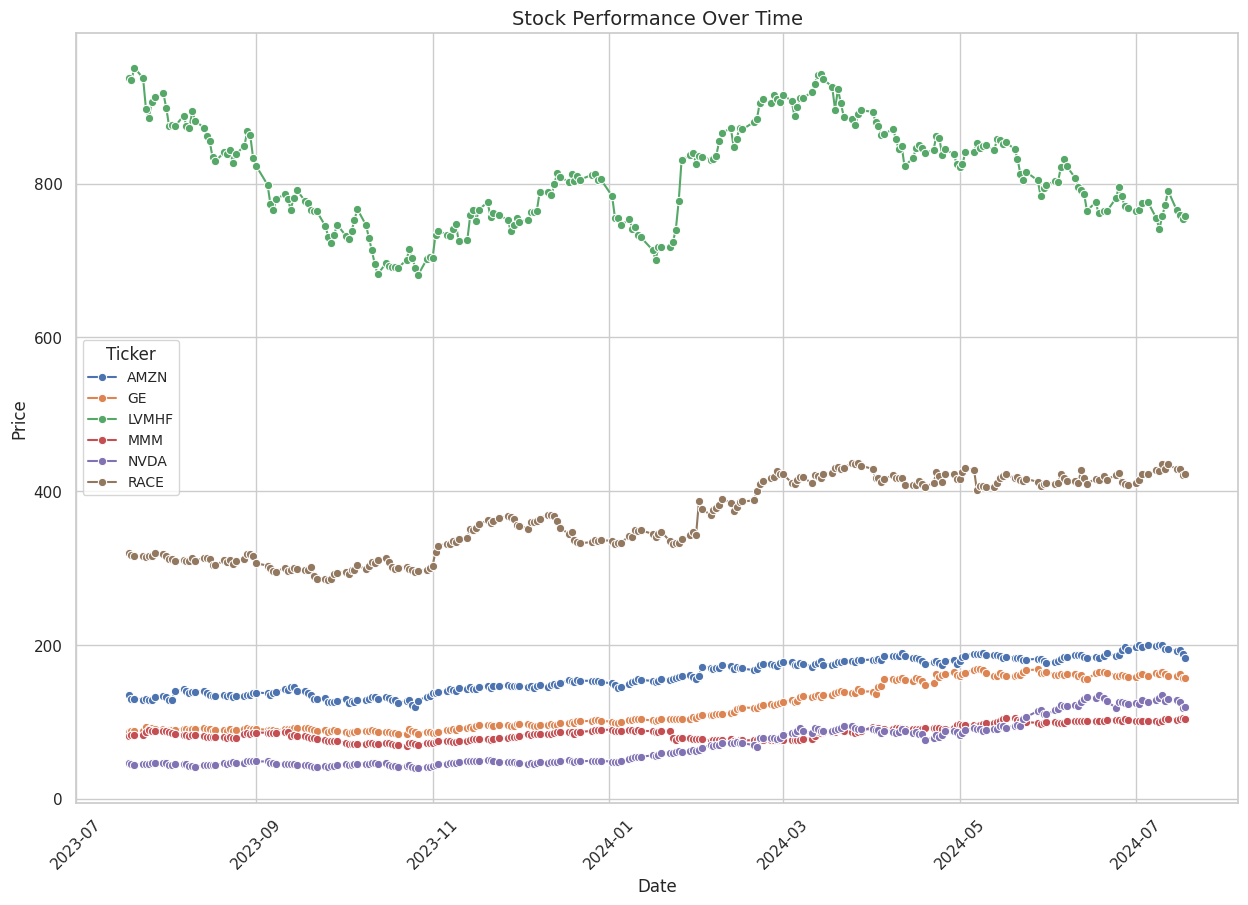

In [19]:
# visualize performance of stock overtime
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

stock_data.set_index('Date', inplace=True)

stock_data.reset_index(inplace=True)

plt.figure(figsize=(15, 10))

sns.set(style='whitegrid')

sns.lineplot(data=stock_data, x='Date', y='Adj Close', hue='Ticker', marker='o')

plt.title('Stock Performance Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(title='Ticker', title_fontsize='12', fontsize='10')
plt.grid(True)

plt.xticks(rotation=45)

plt.show()

Over 1 year from July 2023 to July 2024, Louis Vuitton (LVMHF) has the highest adjusted closing price, however it has also experienced the highest drop in price.

Nvidia(NVDA), Amazon(AMZN), Ferrari(RACE) & General electric(GE) all show noticeabe upward trends, which indicate strong performance over the period, while 3M Co (MMM) has been more stable with the least price fluctuations.

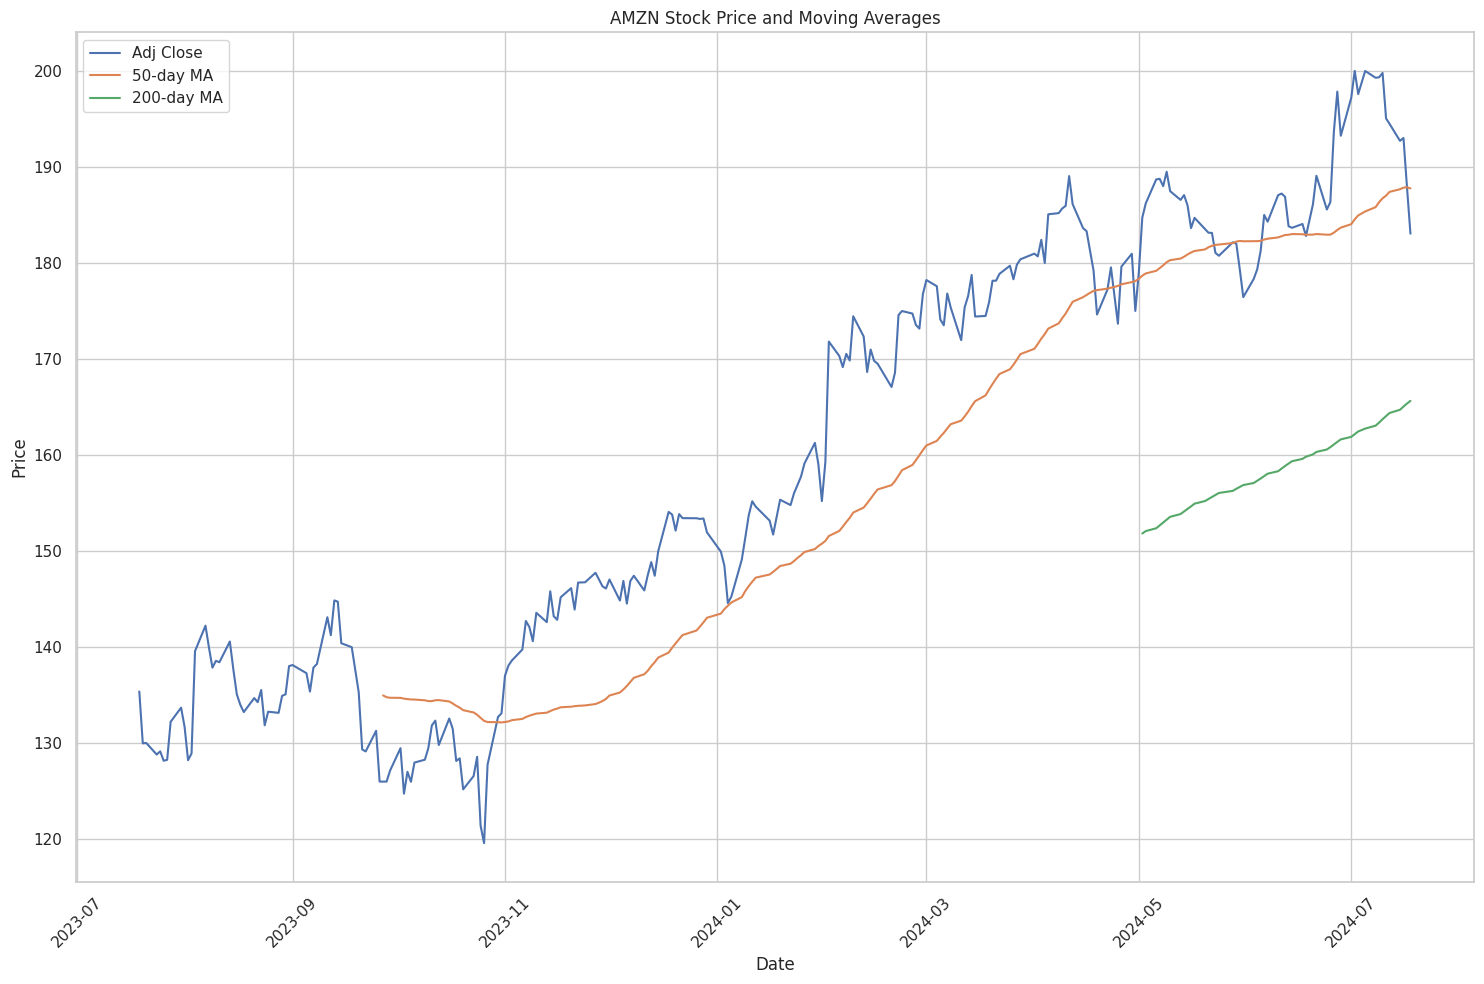

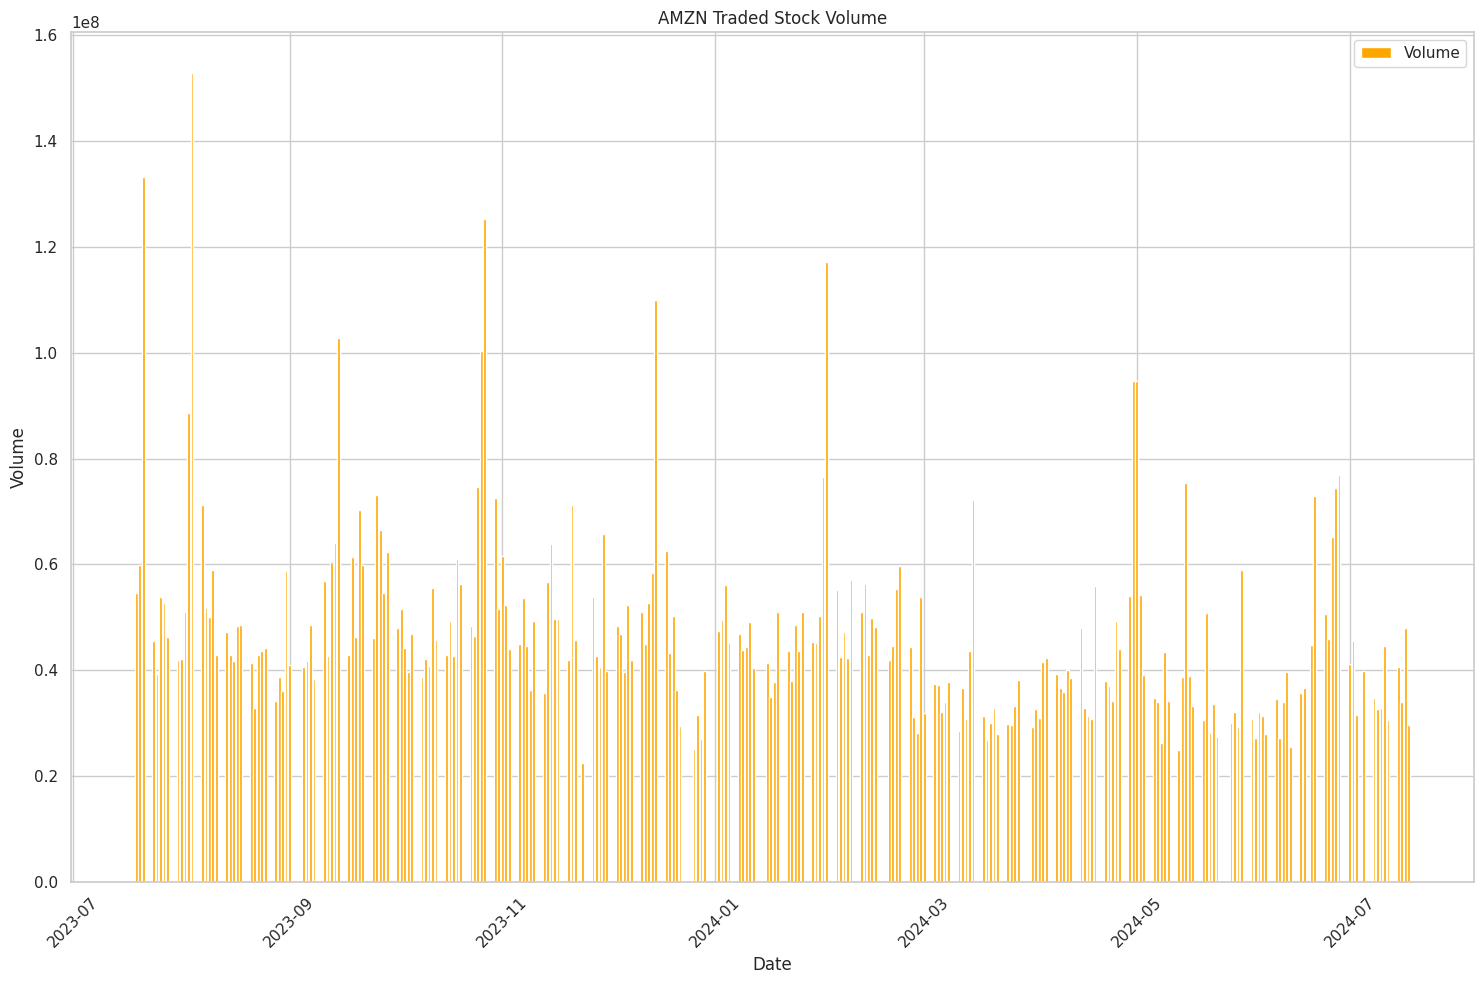

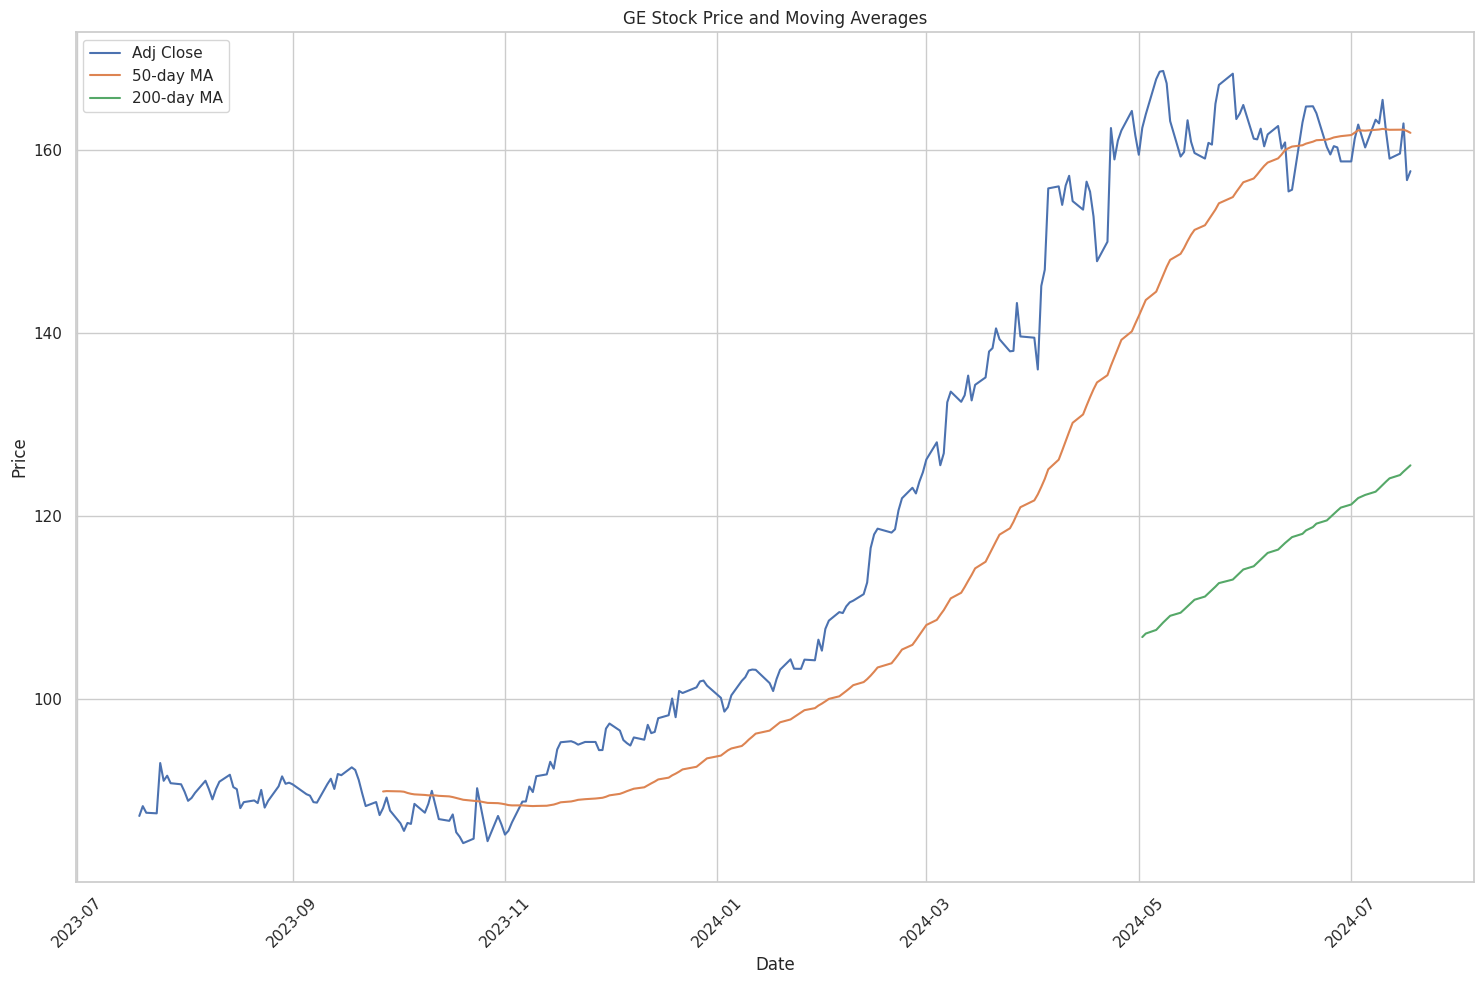

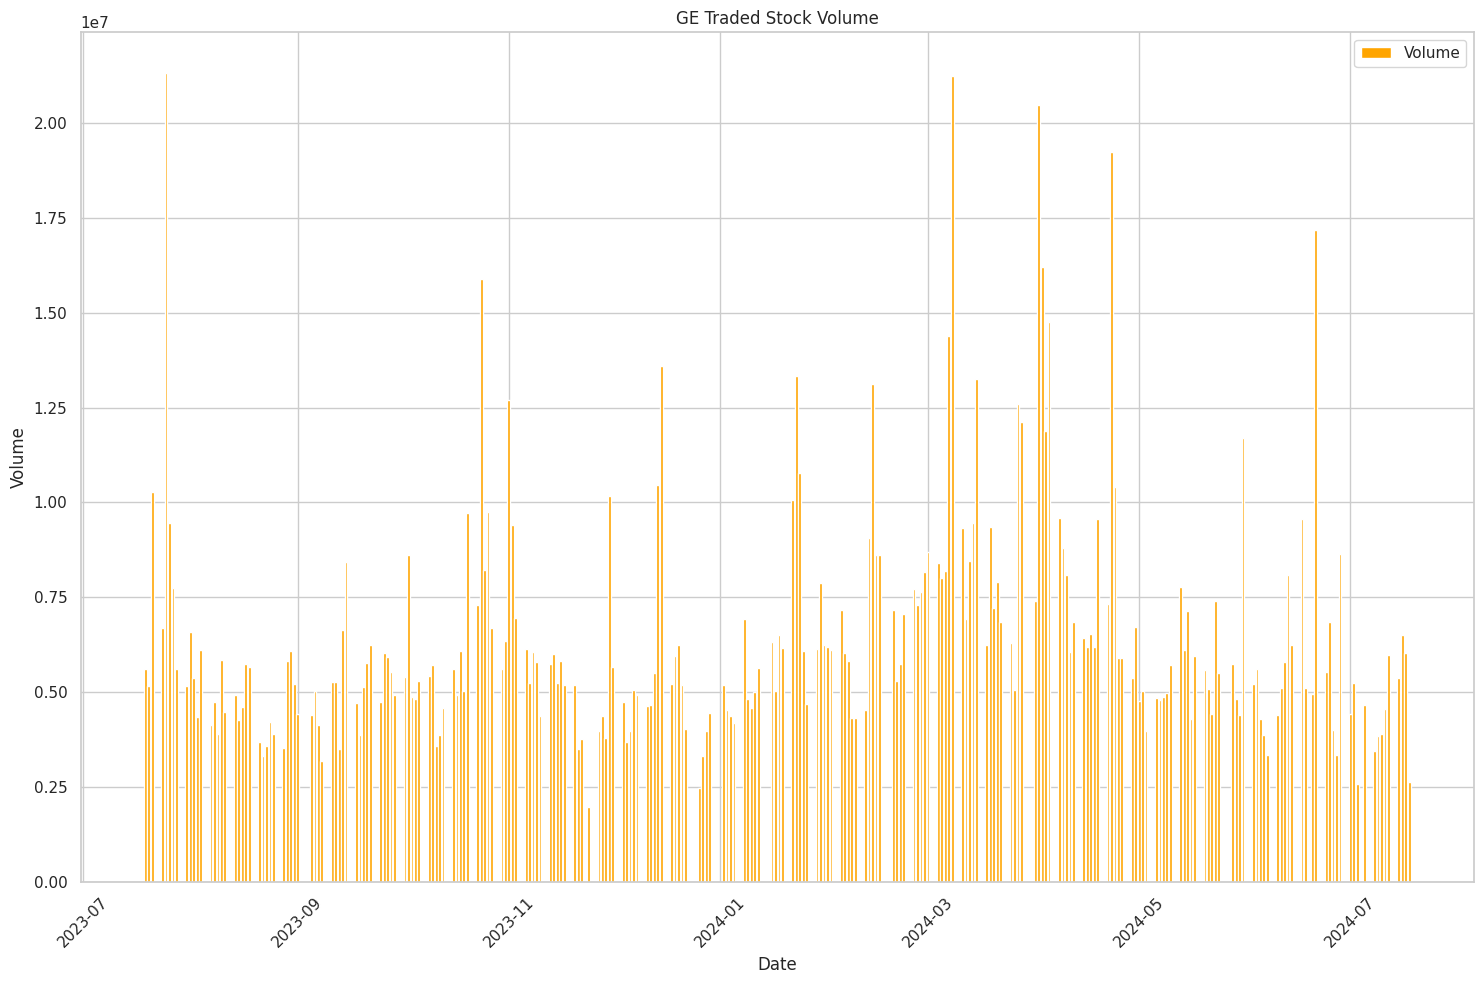

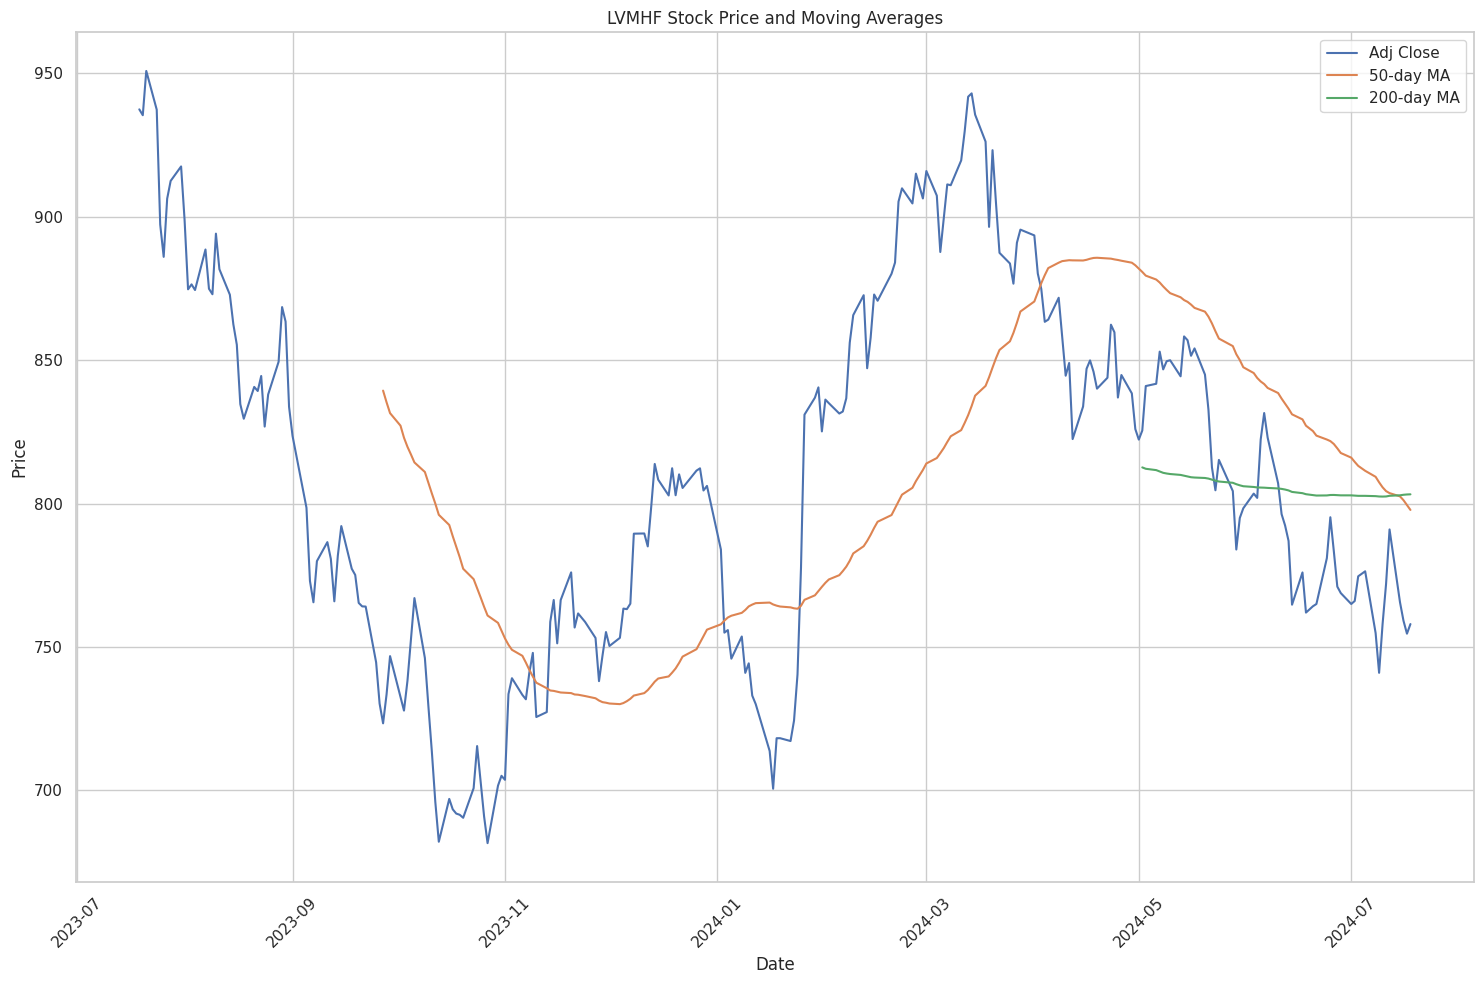

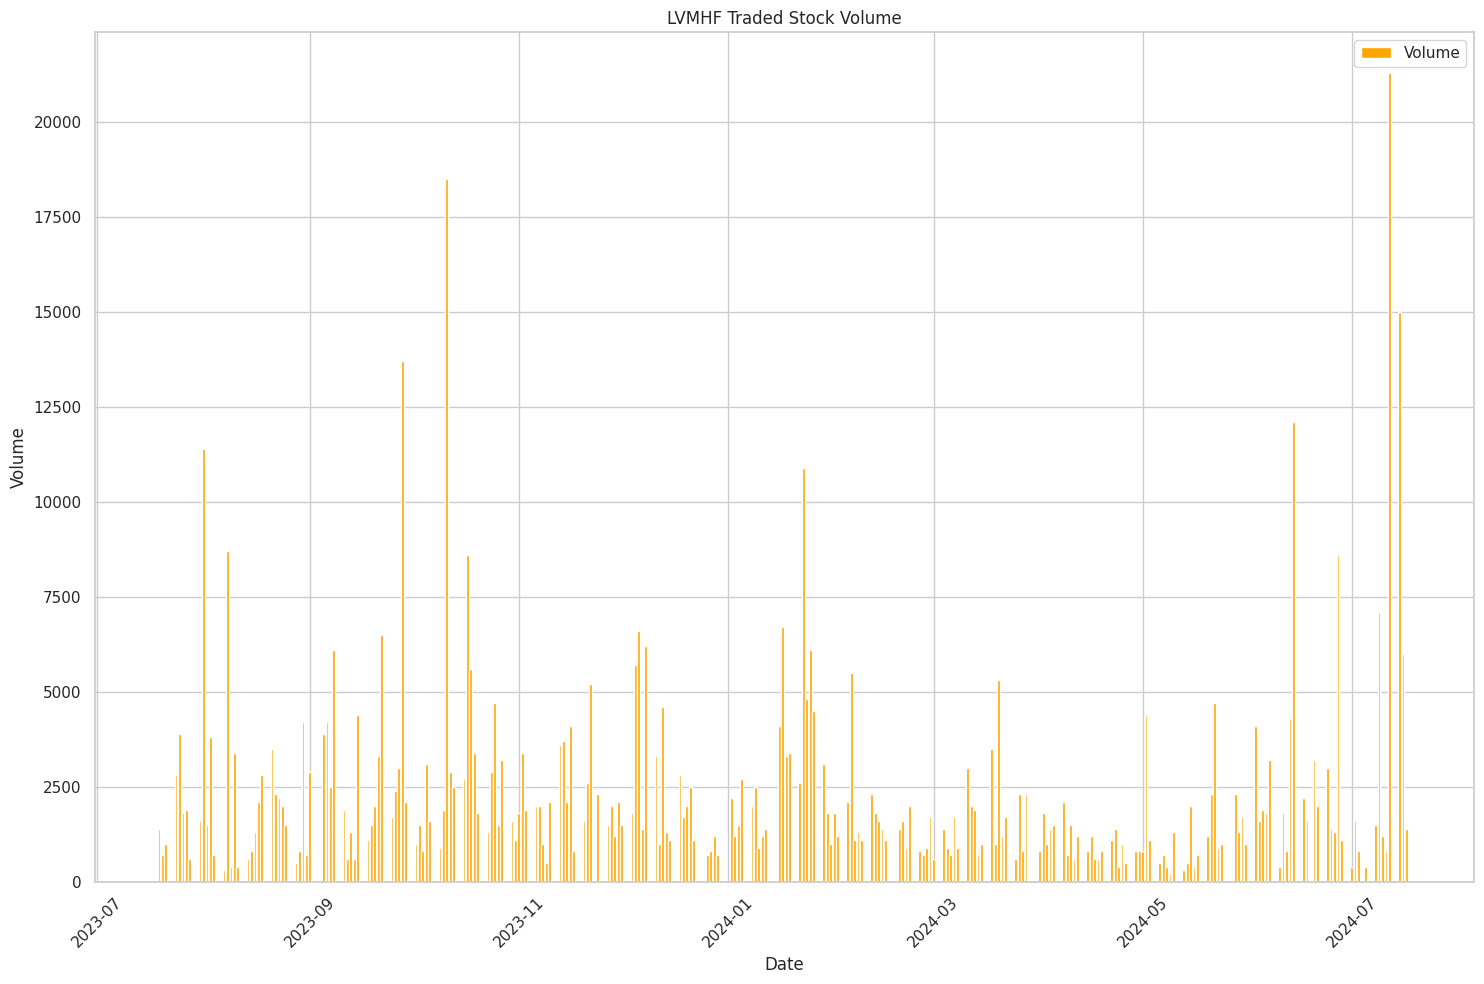

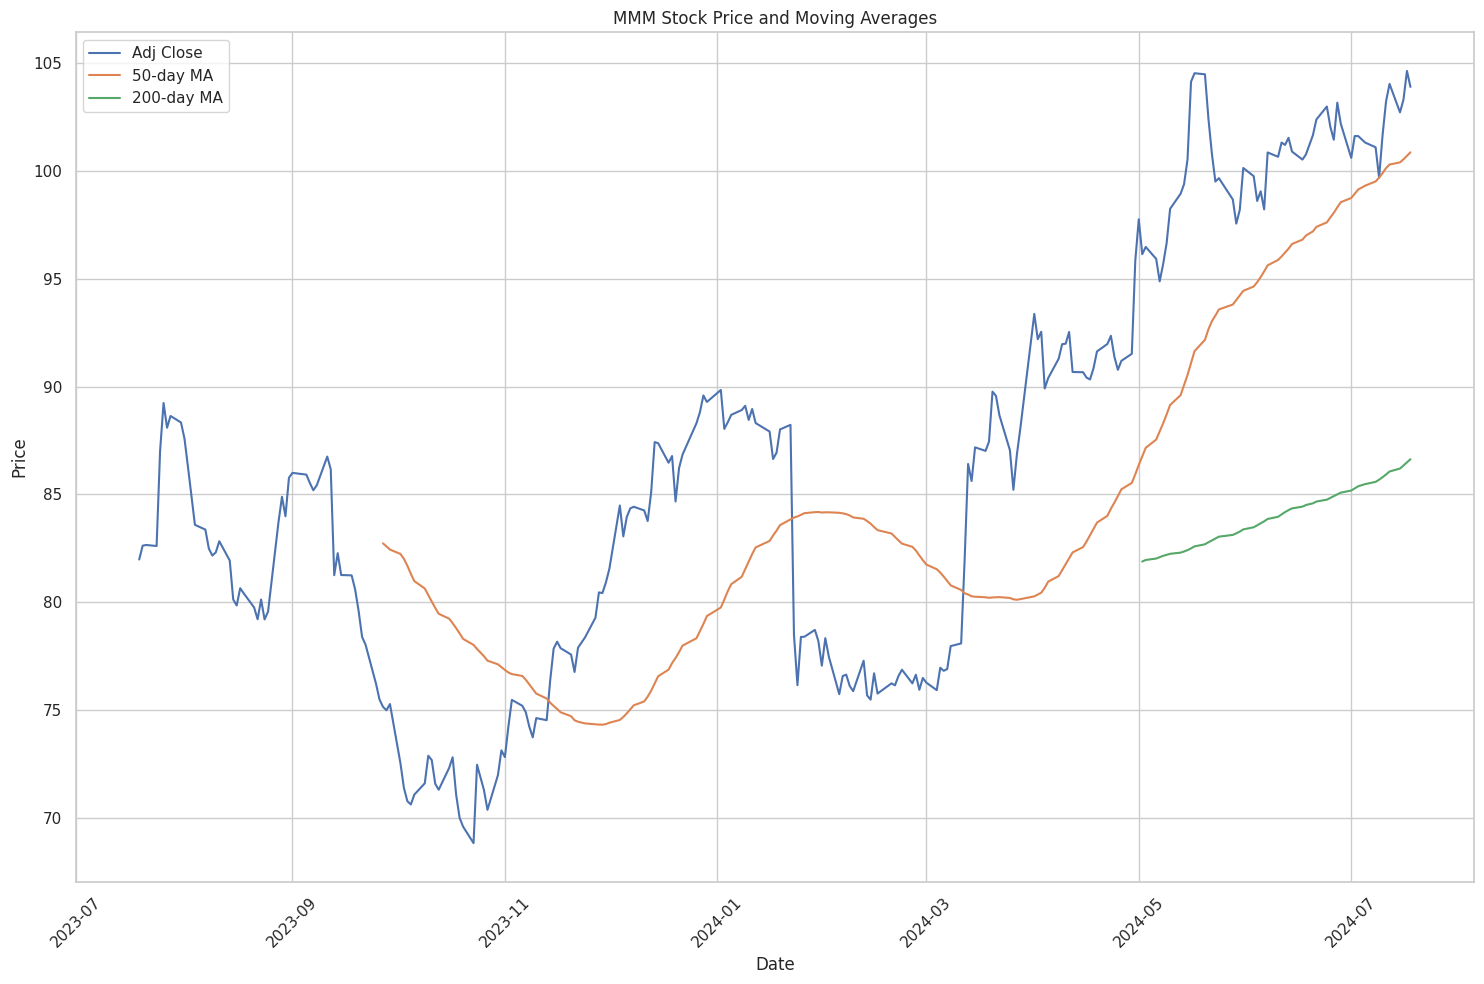

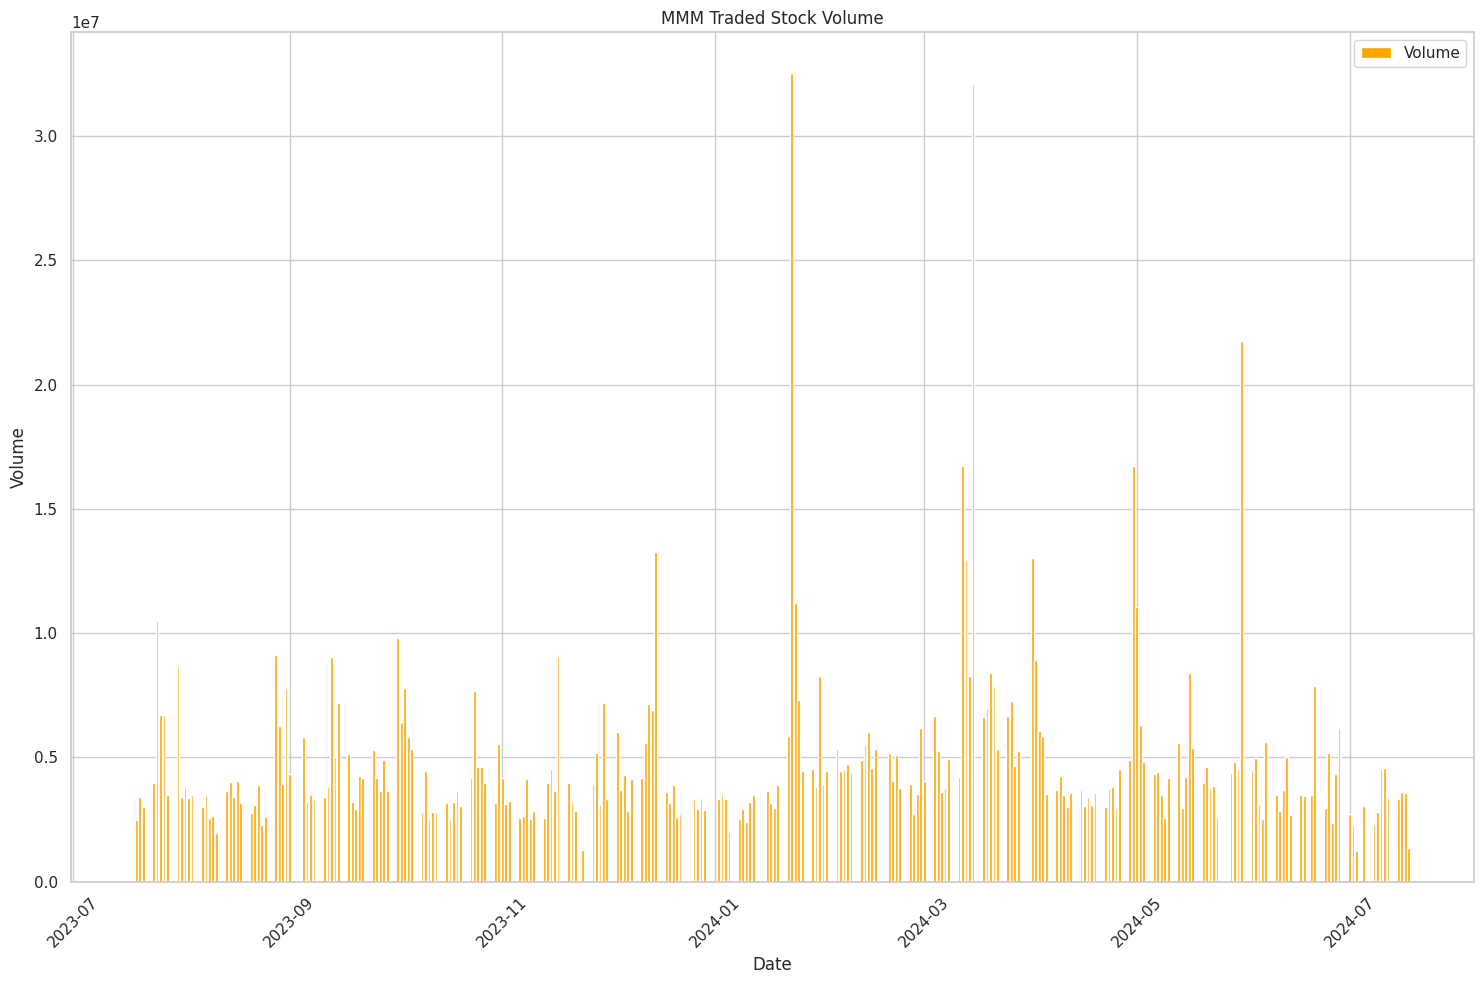

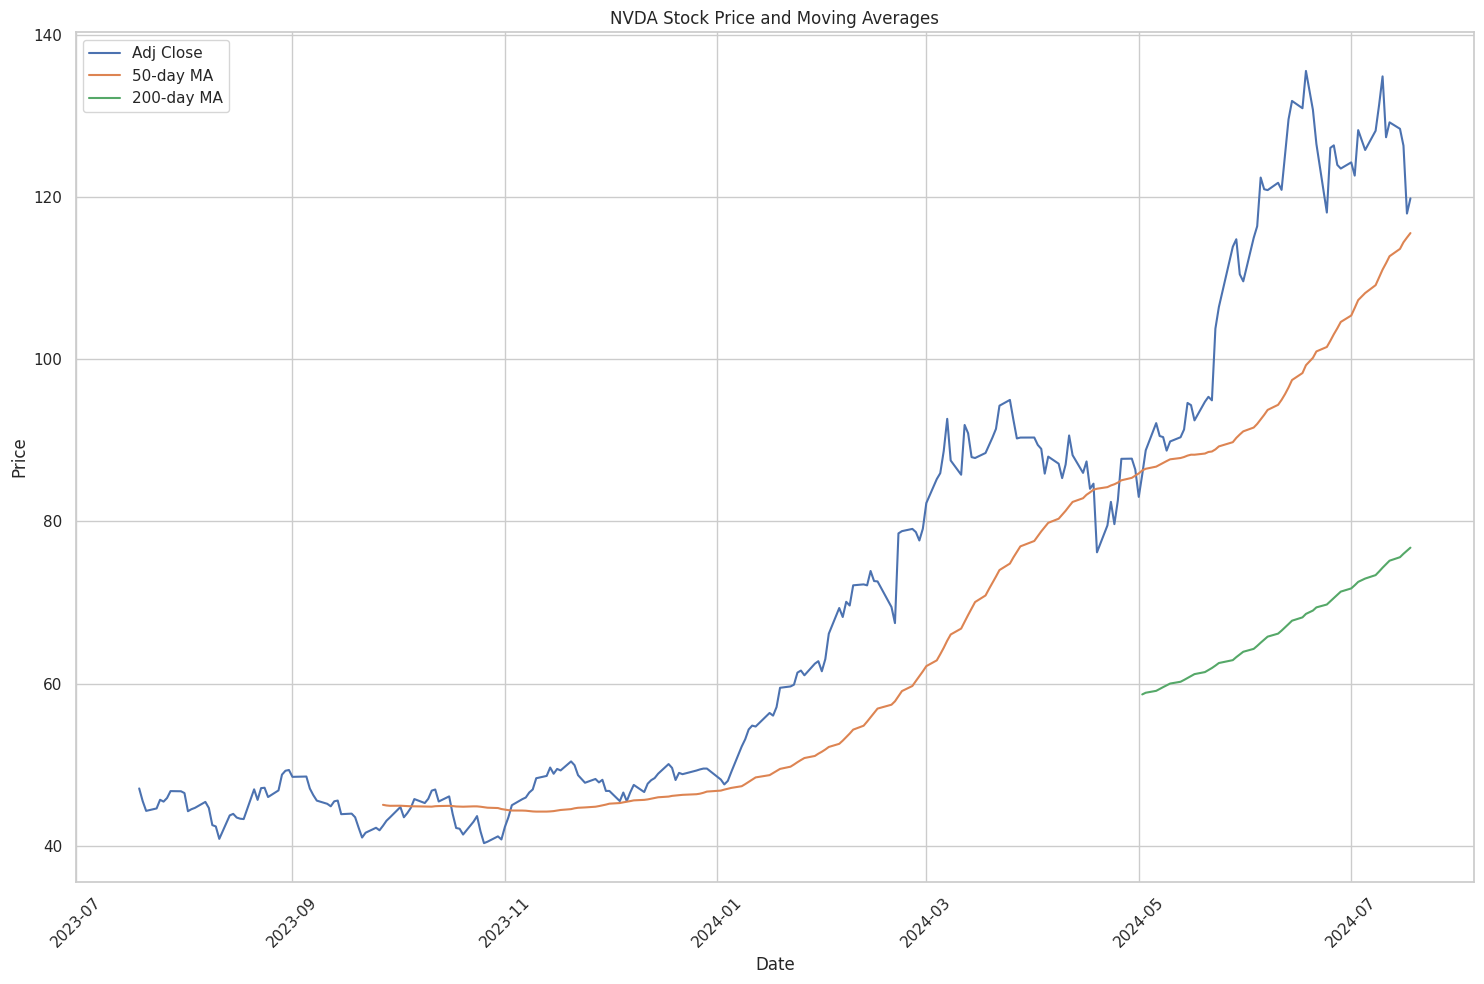

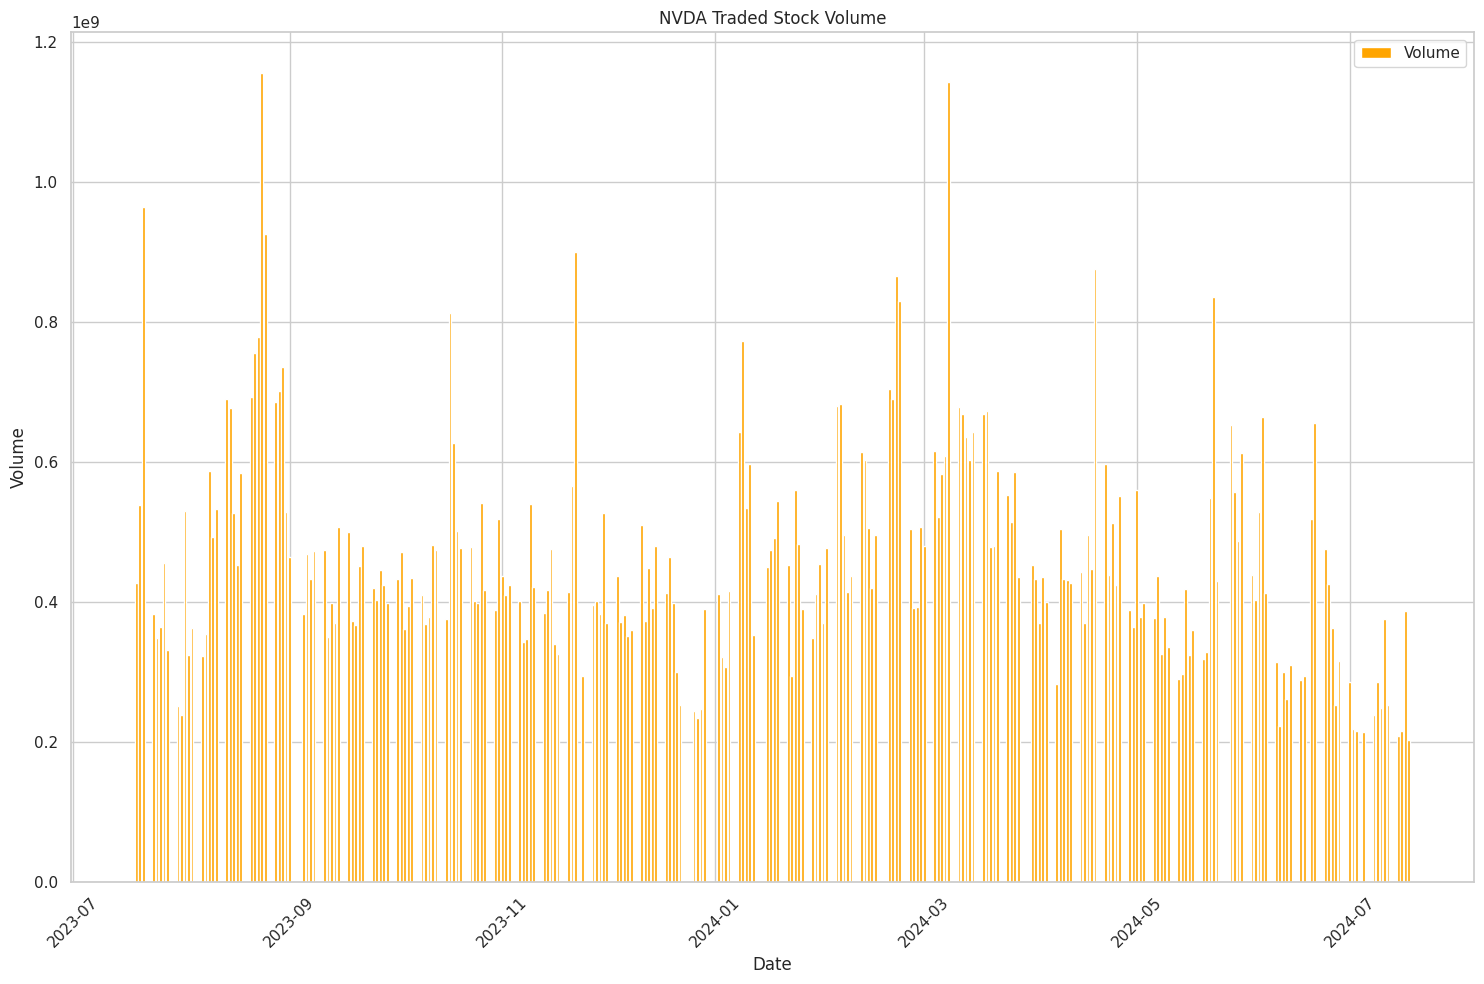

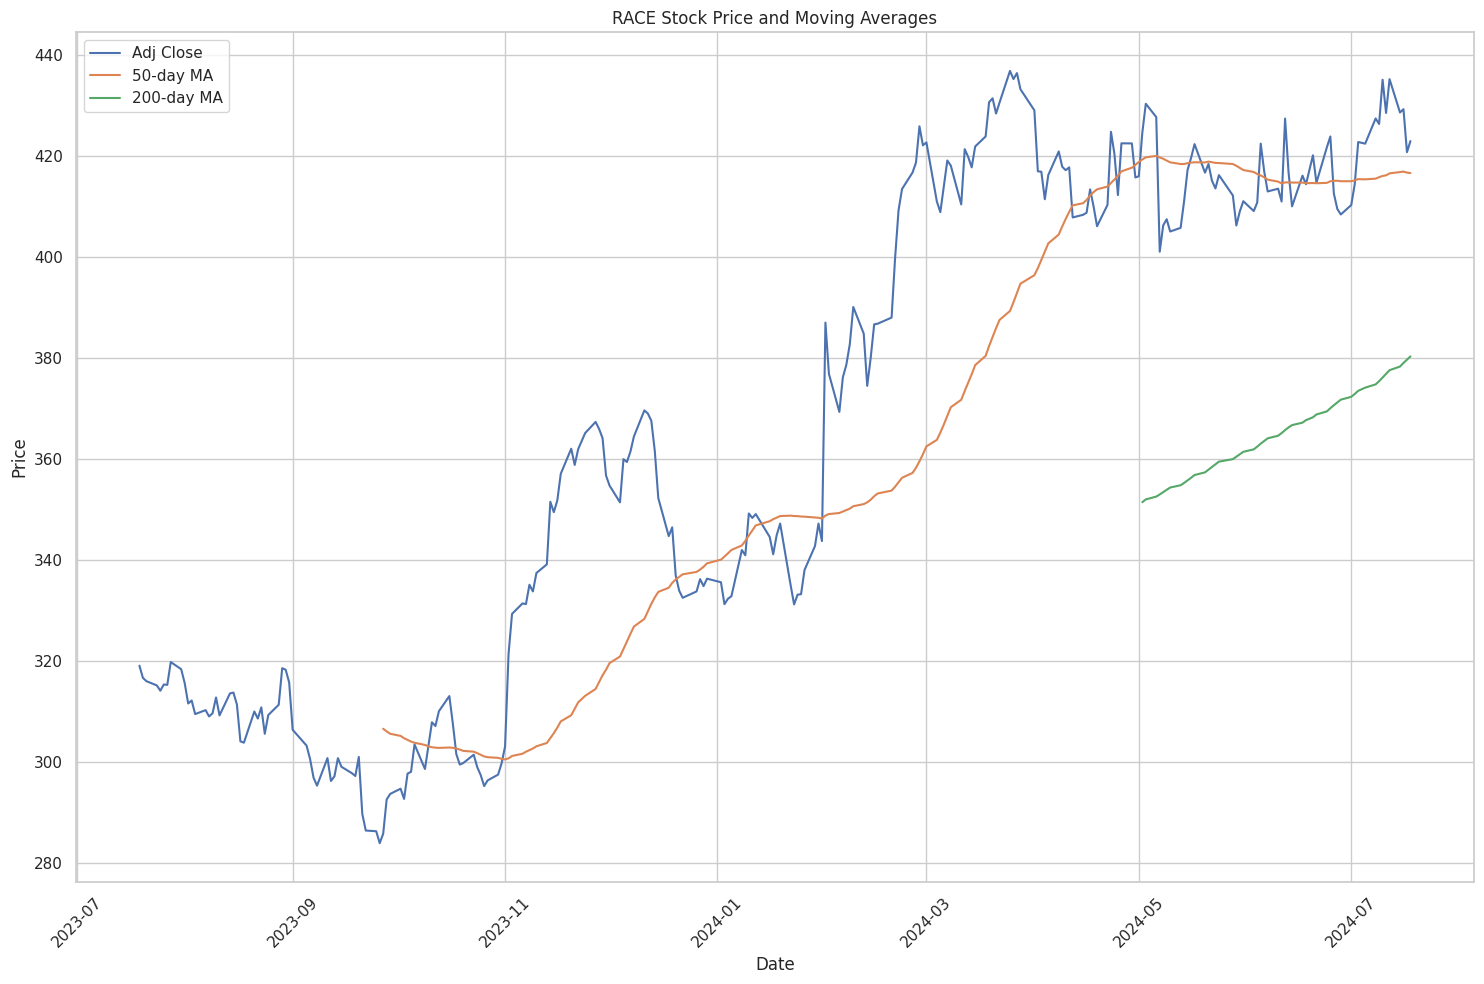

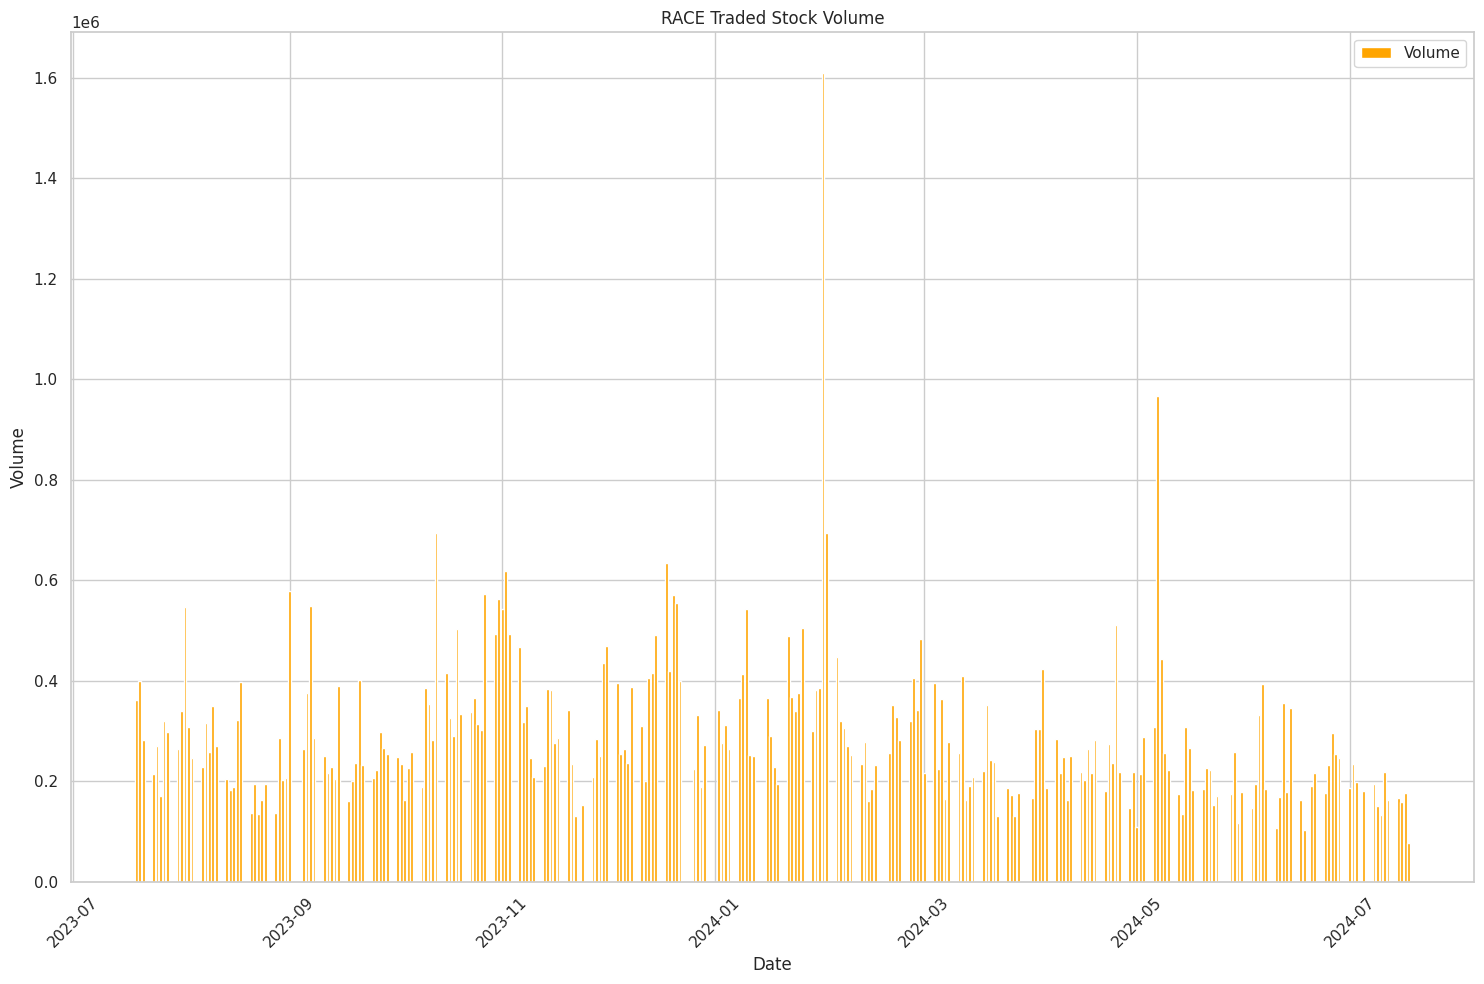

In [20]:
# calculate 50 & 200 day moving averages for each stock
short_window = 50
long_window = 200

stock_data.set_index('Date', inplace=True)
unique_tickers = stock_data['Ticker'].unique()

# define function
for ticker in unique_tickers:
    ticker_data = stock_data[stock_data['Ticker']==ticker].copy()
    ticker_data['50_MA'] = ticker_data['Adj Close'].rolling(window=short_window).mean()
    ticker_data['200_MA'] = ticker_data['Adj Close'].rolling(window=long_window).mean()

    plt.figure(figsize=(15, 10))
    plt.plot(ticker_data.index, ticker_data['Adj Close'], label='Adj Close')
    plt.plot(ticker_data.index, ticker_data['50_MA'], label='50-day MA')
    plt.plot(ticker_data.index, ticker_data['200_MA'], label='200-day MA')
    plt.title(f'{ticker} Stock Price and Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(15, 10))
    plt.bar(ticker_data.index, ticker_data['Volume'], label='Volume', color='orange')
    plt.title(f'{ticker} Traded Stock Volume')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



The moving averages give more insight into the price movements.

MMM shows significant volatility, declining steadily until November 2023 before rebounding strongly in early 2024. LVMHF stock experienced considerable volatility for the period as well, 50-day moving average mirrored this fluctuation,although, the 200-day moving average showed a gradual upward trend until May 2024 before leveling off, indicating potential changes in long-term momentum.

Furthermore, upward slopes are noticeable for  NVDA, AMZN and RACE, showing consistent upward trends in closing prices.

Additionally, the volume traded show spikes at points of high trade volumes.

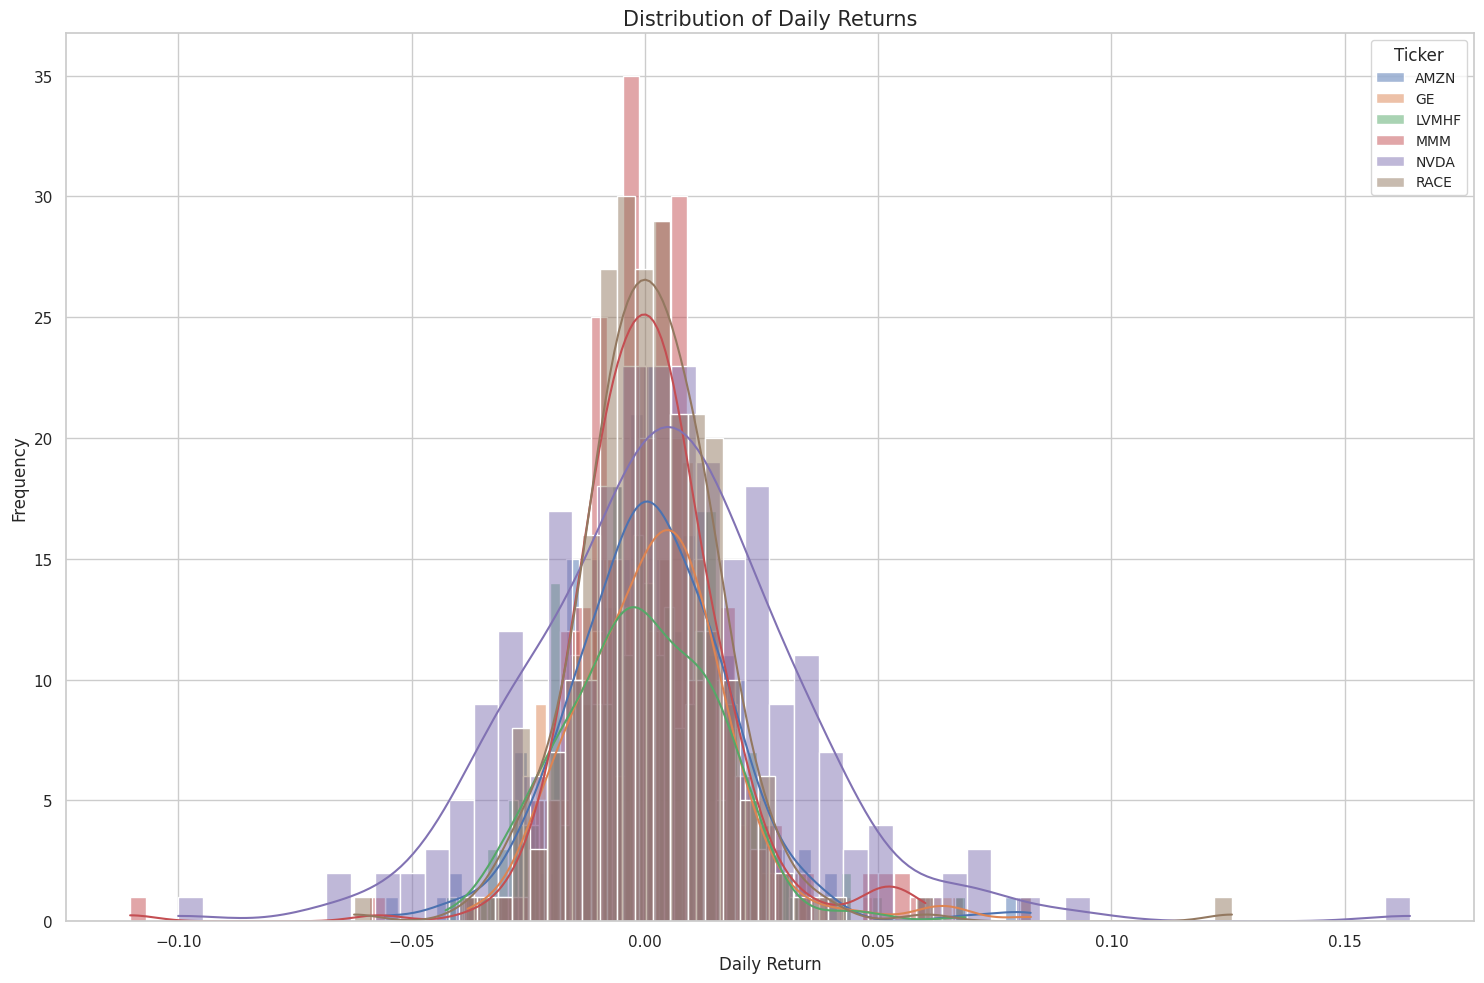

In [21]:
# visualize distribution of daily returns
stock_data['Daily Return'] = stock_data.groupby('Ticker')['Adj Close'].pct_change()

plt.figure(figsize=(15, 10))
sns.set(style='whitegrid')

for ticker in unique_tickers:
    ticker_data = stock_data[stock_data['Ticker']==ticker]
    sns.histplot(ticker_data['Daily Return'].dropna(), bins=50, kde = True, label=ticker, alpha=0.5)

plt.title('Distribution of Daily Returns', fontsize=15)
plt.xlabel('Daily Return', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(title = 'Ticker', title_fontsize = '12', fontsize='10')

plt.grid(True)

plt.tight_layout()
plt.show()


The chart shows a normal distribution, indicating that most daily returns are close to average.

Nevertheless, there are tails on both sides, reflecting occasional significant gains or losses, mostly significant with NVDA, having the widest distribution, suggesting a higher volatility compared to the other stocks.

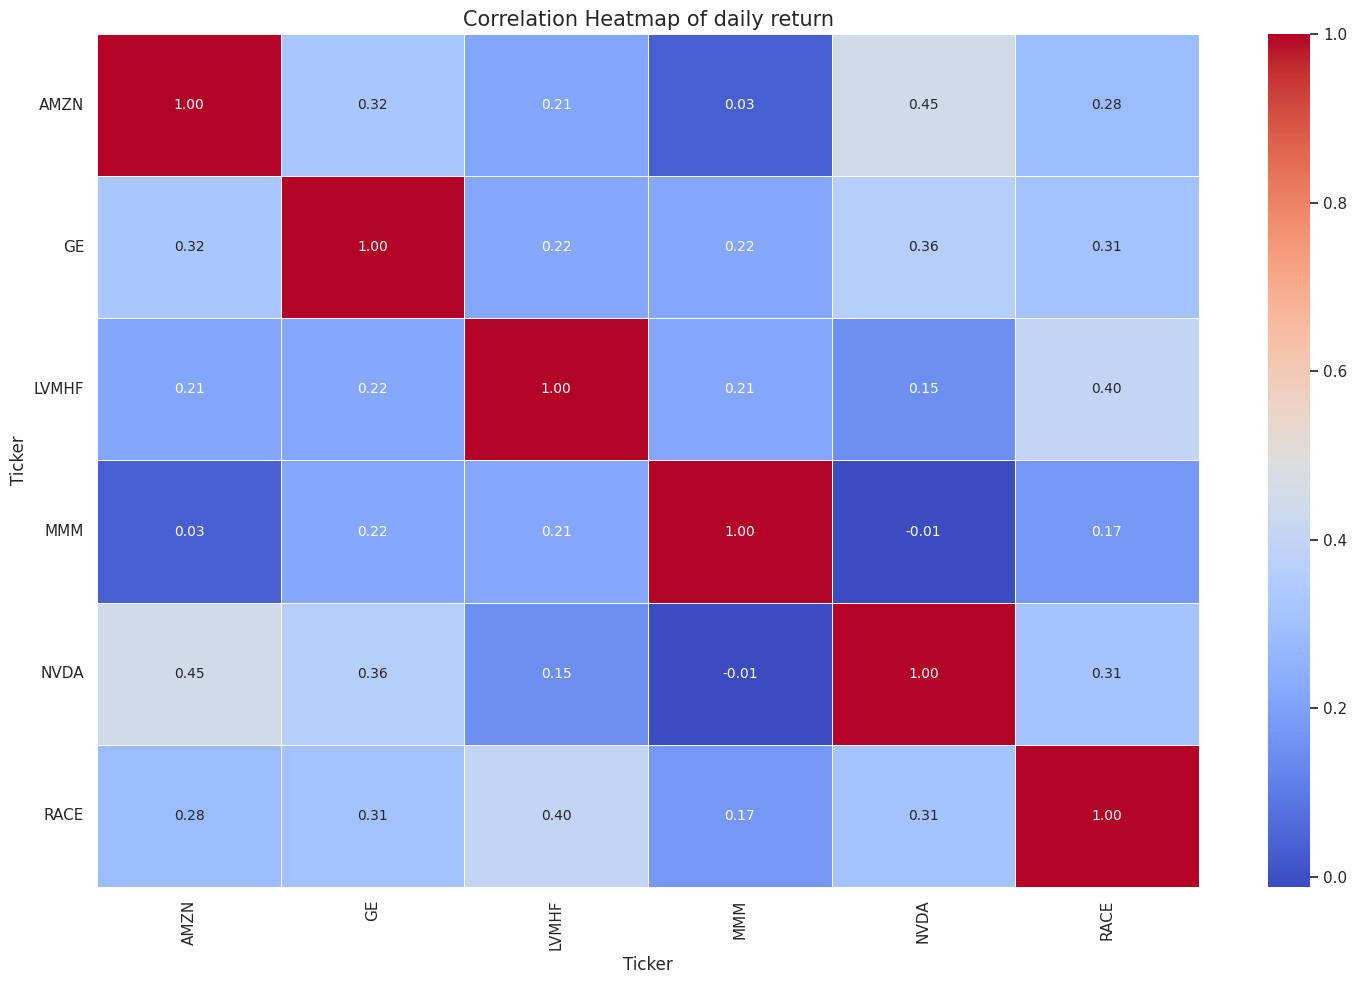

In [22]:
# check for correlation between stocks in our portfolio

daily_returns = stock_data.pivot_table(index='Date', columns='Ticker', values='Daily Return')
correlation_matrix = daily_returns.corr()

plt.figure(figsize=(15, 10))
sns.set(style='whitegrid')

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, fmt='.2f', annot_kws={'size': 10})

plt.title('Correlation Heatmap of daily return', fontsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Stocks in similar sectors show the highest positive correlation, indicating that they tend to move in the same direction, while negative and low correlation is seen between stocks from different sectors.

When stocks have a high correlation they are prone to similar risks, since stocks from different industries have the least correlations, they offer diversification benefits and reduce overall portfolio risk.

## Construct efficient portfolio with balanced risk and return in 3 steps;
1. Calculate expected returns and volatility of each stock.
2. Generate random portfolios to identify efficient frontier.
3. Optimize portfolio to maximize the Sharpe ratio(risk-adjusted return)

In [23]:
# calculate expected returns and volatility for each stock
expected_returns = daily_returns.mean() * 252  # annualize returns (252 trading days in a year)
volatility = daily_returns.std() * np.sqrt(252)  # annualize volatility

stock_stats = pd.DataFrame({'Expected Return': expected_returns, 'Volatility': volatility})
stock_stats

,Expected Return,Volatility
Ticker,,
AMZN,0.341805,0.279563
GE,0.629200,0.266769
LVMHF,-0.179412,0.261080
MMM,0.273409,0.265996
NVDA,1.044376,0.460304
RACE,0.316237,0.260233


Thomas Jefferson's famous quote 'with great risks comes great reward' rings true here.

NVDA has the highest expected return and a corresponding high volatility and AMZN has moderate returns with a lower risk, this is expected as the risk-return tradeoff of investment.

However, 3M has the lowest expected return with a higher risk compared to other stocks, which makes it the least attractive in terms of risk adjusted returns.


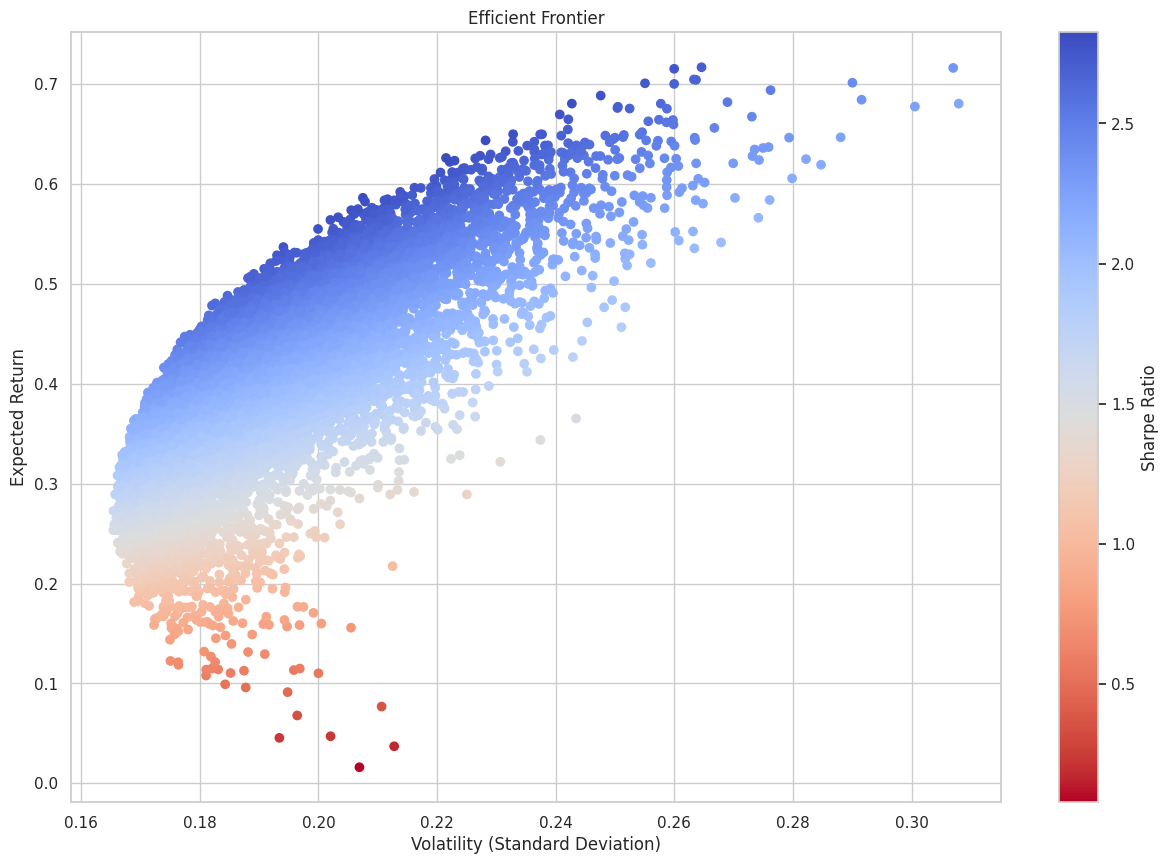

In [24]:
# generate large number of random portfolio weights
def portfolio_performance(weights, returns, cov_matrix): # function to calculate portfolio performance
    portfolio_return = np.dot(weights, returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_return, portfolio_volatility

# number of portfolios to simulate
num_portfolios = 10000

# arrays to store the results
results = np.zeros((3, num_portfolios))

# annualized covariance matrix
cov_matrix = daily_returns.cov() * 252

np.random.seed(42)

for i in range(num_portfolios):
    weights = np.random.random(len(unique_tickers))
    weights /= np.sum(weights)
    portfolio_return, portfolio_volatility = portfolio_performance(weights, expected_returns, cov_matrix)

    results[0, i] = portfolio_return
    results[1, i] = portfolio_volatility
    results[2, i] = portfolio_return / portfolio_volatility # Sharpe Ratio

plt.figure(figsize=(15, 10))
plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap='coolwarm_r')
plt.title('Efficient Frontier')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Return')
plt.colorbar(label='Sharpe Ratio')
plt.grid(True)
plt.show()

# generate random portfolios

The graph shows our random portfolio of 10,000 possible weights, each dot represenets a portfolio. The optimal portfolios are closer to the y-axis, giving the highest yield of expected returns for a given level of volality.

The colour gradient shows that portfolios with the highest Sharpe ratios (darker blue) provide better risk-adjusted returns.

In [25]:
# identify the portfolio with the maximum Sharpe ratio
max_sharpe_index = np.argmax(results[2])
max_sharpe_return = results[0, max_sharpe_index]
max_sharpe_volatility = results[1, max_sharpe_index]
max_sharpe_ratio = results[2, max_sharpe_index]

print(f'Maximum Expected Return: {max_sharpe_return*100:.2f}%')
print(f'Maximum Volatility: {max_sharpe_volatility*100:.2f}%')
print(f'Maximum Sharpe Ratio: {max_sharpe_ratio:.4f}')

Maximum Expected Return: 62.59%
Maximum Volatility: 22.15%
Maximum Sharpe Ratio: 2.8254


In [26]:
# identify weights of stocks that yields max Sharpe ratio
max_sharpe_weights = np.zeros(len(unique_tickers))

for i in range(num_portfolios):
    weights = np.random.random(len(unique_tickers))
    weights /= np.sum(weights)

    portfolio_return, portfolio_volatility = portfolio_performance(weights, expected_returns, cov_matrix)

    if results[2, i] == max_sharpe_ratio:
        max_sharpe_weights = weights
        break

portfolio_weights_df = pd.DataFrame({'Ticker': unique_tickers, 'Weight': max_sharpe_weights})
portfolio_weights_df

,Ticker,Weight
0,AMZN,0.146330
1,GE,0.088000
2,LVMHF,0.295739
3,MMM,0.067548
4,NVDA,0.358123
5,RACE,0.044260


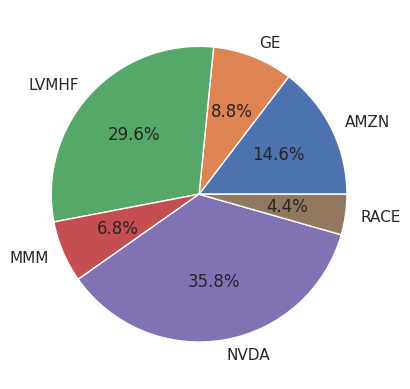

In [27]:
# visualize our optimized portfolio

plt.pie(portfolio_weights_df['Weight'], labels=portfolio_weights_df['Ticker'], autopct='%1.1f%%')
plt.show()


Finally, we have our winning porfolio mix.

For an optimized portfolio, we need a balanced allocation that leverages individual stock performance (return & volatility) and their correlation to maximize returns while minimizing risks.



## *This document is for educational purposes only and is not intended to be investment advice.*
